In [1]:
import os
import sys
import git
import pathlib

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

PROJ_ROOT_PATH = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
PROJ_ROOT =  str(PROJ_ROOT_PATH)
if PROJ_ROOT not in sys.path:
    sys.path.append(PROJ_ROOT)

In [6]:
from stable_baselines3 import A2C
from lib.resultsviz import eval_single_run

# Specify experiment
sparsity = 0.2
env_id = "BreakoutNoFrameskip-v4"
# exp_tag = f"vanilla"
exp_tag = f"sparse_{sparsity}"
exp_name = f"{env_id}--{exp_tag}"

In [7]:
from lib.resultsviz import generate_gif_single_run
algorithm = A2C
run_no=0
seed = 346

generate_gif_single_run(exp_name = exp_name, 
                        algorithm = algorithm, 
                        run_no = run_no, 
                        seed = seed, 
                        model_type="best", 
                        duration=10, 
                        fps=480)

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


In [3]:
# Training Statistics

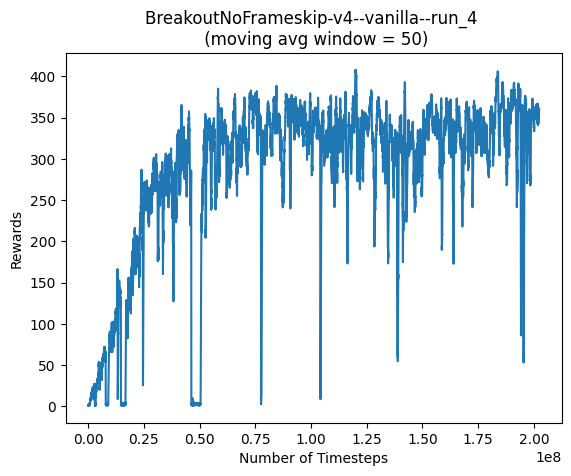

In [4]:
from lib.resultsviz import plot_single_run_rewards
plot_single_run_rewards(exp_name, run_no=4, window=50)

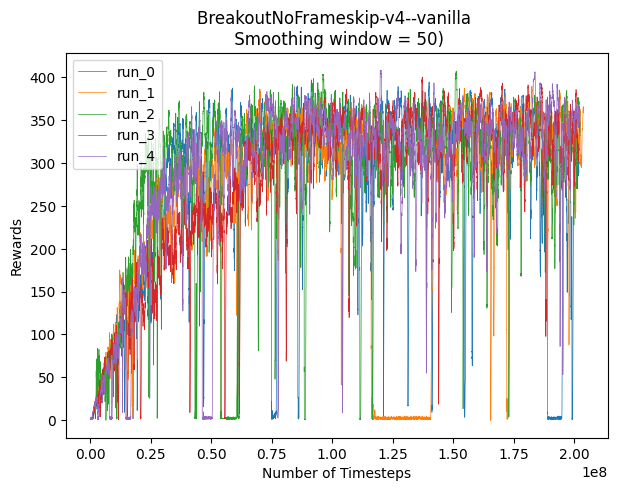

In [5]:
from lib.resultsviz import plot_all_run_rewards
plot_all_run_rewards(exp_name, window=50)

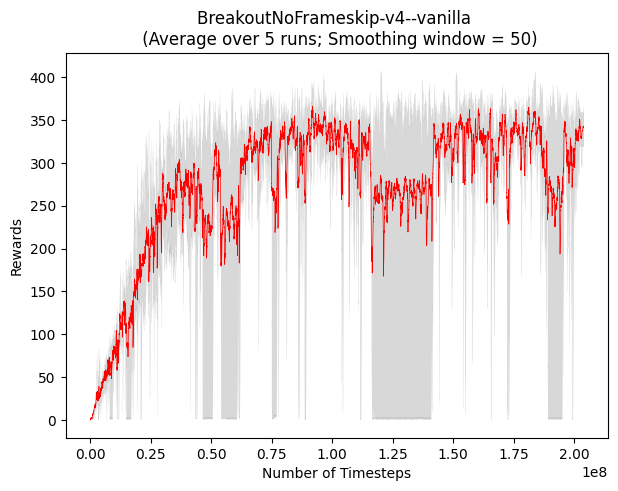

In [6]:
from lib.resultsviz import plot_all_run_average_rewards
plot_all_run_average_rewards(exp_name, window=50, err_type="range")

In [7]:
from lib.resultsviz import eval_single_run, plot_eval_all_run

In [8]:
from lib.env_utils import make_trial_env

In [9]:
# EVALUATION IN ORIGINAL ENVIRONMENT
# Make trial environment
NUM_ENVS = 2
SEED = 123
NUM_EPISODES=3

trial_env = make_trial_env(env_id=env_id,
                           n_envs=NUM_ENVS,
                           seed=SEED,
                           sparsity=sparsity)

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


In [10]:
## EVALUATION USING LAST MODEL
# Evaluate single run
RUN = 0
mean_reward, std_reward = eval_single_run(trial_env=trial_env,
                                          algorithm=A2C,
                                          exp_name=exp_name, 
                                          run_no=RUN,
                                          seed=SEED,
                                          model_type="last",
                                          NUM_EPISODES=NUM_EPISODES)
print(f"{mean_reward=}, {std_reward=}")

mean_reward=361.6666666666667, std_reward=24.567367696917707


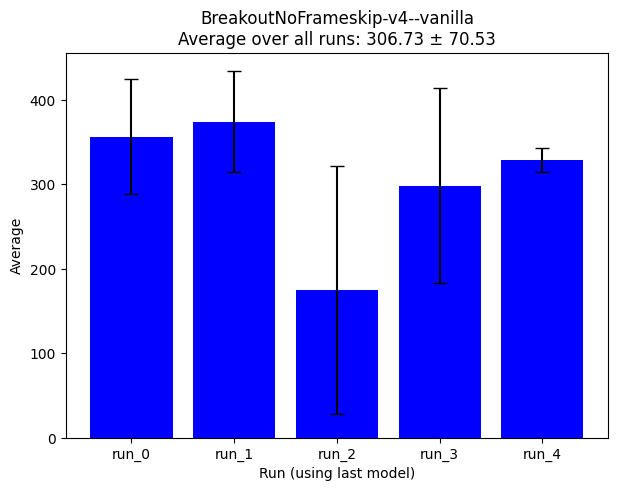

In [11]:
# Plot results of evaluation over all runs
plot_eval_all_run(trial_env=trial_env,
                  algorithm=A2C,
                  exp_name=exp_name, 
                  seed=SEED,
                  model_type="last",
                  NUM_EPISODES=NUM_EPISODES
 )

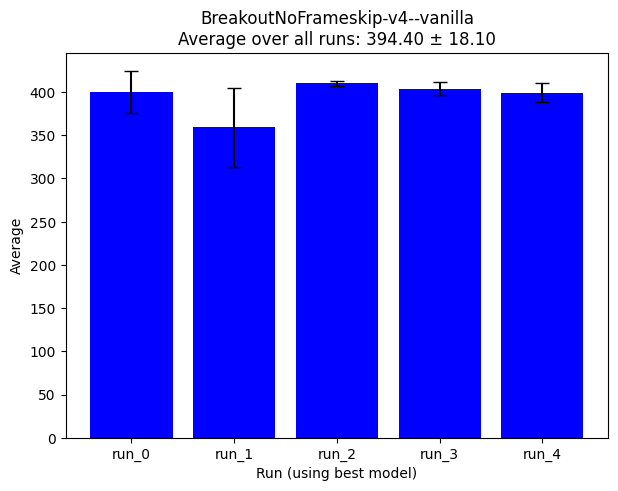

In [12]:
## EVALUATION USING BEST MODEL
# Plot results of evaluation over all runs
from lib.resultsviz import plot_eval_all_run
plot_eval_all_run(trial_env=trial_env,
                  algorithm=A2C,
                  exp_name=exp_name, 
                  seed=SEED,
                  model_type="best",
                  NUM_EPISODES=NUM_EPISODES
 )

In [13]:
## EVALUATION in vanilla environment
# Make trial environment
NUM_ENVS = 3
SEED = 123
NUM_EPISODES=2

trial_env_vanilla = make_trial_env(env_id=env_id,
                           n_envs=NUM_ENVS,
                           seed=SEED,
                           sparsity=0.0)

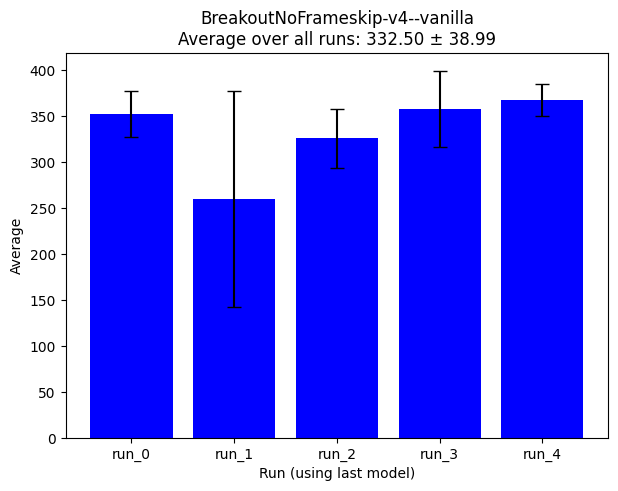

In [14]:
## EVALUATION USING LAST MODEL
# Plot results of evaluation over all runs using vanilla environment
plot_eval_all_run(trial_env=trial_env_vanilla,
                  algorithm=A2C,
                  exp_name=exp_name, 
                  seed=SEED,
                  model_type="last",
                  NUM_EPISODES=NUM_EPISODES
                    )         

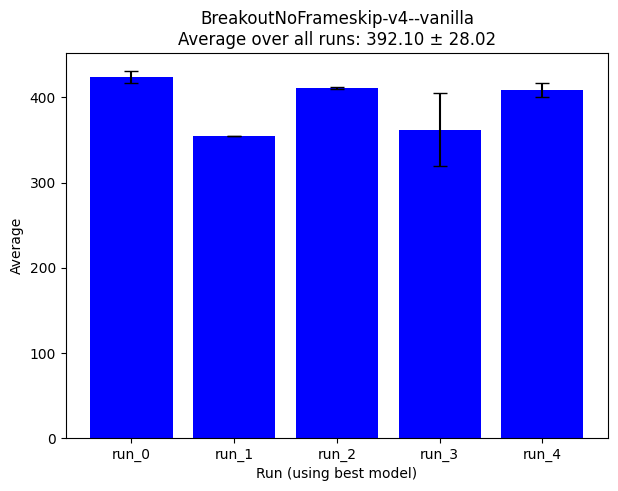

In [15]:
## EVALUATION USING LAST MODEL
# Plot results of evaluation over all runs using vanilla environment
plot_eval_all_run(trial_env=trial_env_vanilla,
                  algorithm=A2C,
                  exp_name=exp_name, 
                  seed=SEED,
                  model_type="best",
                  NUM_EPISODES=NUM_EPISODES
                    )         